In [103]:
import pandas as pd
import numpy as np
import sqlite3
import pandasql
from pandasql import sqldf
import matplotlib.pyplot as plt
import sklearn

pysqldf = lambda q: sqldf(q, globals())

# q = """
# ;"""
# data_cleaned = pysqldf(q)
# data_cleaned

In [2]:
data1 = pd.read_csv("./data/202004-divvy-tripdata.csv")
data2 = pd.read_csv("./data/202005-divvy-tripdata.csv")
data3 = pd.read_csv("./data/202006-divvy-tripdata.csv")
data4 = pd.read_csv("./data/202007-divvy-tripdata.csv")
data5 = pd.read_csv("./data/202008-divvy-tripdata.csv")
data6 = pd.read_csv("./data/202009-divvy-tripdata.csv")
data7 = pd.read_csv("./data/202010-divvy-tripdata.csv")
data8 = pd.read_csv("./data/202011-divvy-tripdata.csv")
data9 = pd.read_csv("./data/202012-divvy-tripdata.csv")


In [3]:

data10 = pd.read_csv("./data/202101-divvy-tripdata.csv")
data11 = pd.read_csv("./data/202102-divvy-tripdata.csv")
data12 = pd.read_csv("./data/202103-divvy-tripdata.csv")
data13 = pd.read_csv("./data/202104-divvy-tripdata.csv")
data14 = pd.read_csv("./data/202105-divvy-tripdata.csv")
data15 = pd.read_csv("./data/202106-divvy-tripdata.csv")
data16 = pd.read_csv("./data/202107-divvy-tripdata.csv")
data17 = pd.read_csv("./data/202108-divvy-tripdata.csv")
data22 = pd.read_csv("./data/Divvy_Trips_2020_Q1.csv")


In [4]:

# data19 = pd.read_csv("./data/Divvy_Trips_2019_Q2")

# data18 = pd.read_csv("./data/Divvy_Trips_2019_Q1")

# data20 = pd.read_csv("./data/Divvy_Trips_2019_Q3.csv")
# data21 = pd.read_csv("./data/Divvy_Trips_2019_Q4.csv")


In [5]:
data_cleaned = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13, data14, data15, data16, data17, data22])
data_cleaned.sort_values(by='started_at', inplace=True)

# Casual vs Member Riders

- Differences between the 2 kinds of users
    - Who bikes more often?
    - Are there differences in the times they bike at? (time of day; day of week; month of year)
    - Are there differences in the rideable types?
    - Are there differences in duration?
    - Differences in Location?

In [211]:
# Scatter Plot:
# Color to show member vs casual 
# Opacity to show number of trips
# x-axis plots the time of day
# y-axis plots the total ride Time

def get_class_data(data1_times, name):
    member_data = data1_times[data1_times['member_casual'] == name]
    member_data['hour'] = pd.to_datetime(member_data['started_at']).dt.hour
    member_data['trips'] = 1
    member_data['duration'] = member_data['duration'].dt.seconds/3600
    member_scatter = member_data.groupby(['hour'])['duration'].agg('sum')
    alphas = member_data.groupby(['hour'])['trips'].agg('sum')
    member_x = list(member_scatter.index)
    member_y = list(member_scatter.values)
    return member_x, member_y, alphas

def create_versus_scatter(data, month):
    data_times = data.drop(data.columns[[4,5,6,7,8,9,10,11]], axis=1)
    data_times['duration'] = pd.to_datetime(data_times['ended_at']) - pd.to_datetime(data_times['started_at'])

    member_x, member_y, alphas_m = get_class_data(data_times, 'member')
    casual_x, casual_y, alphas_c = get_class_data(data_times, 'casual')

    combined = list(alphas_c) + list(alphas_m)
    alphas = sklearn.preprocessing.minmax_scale(combined, feature_range=(10, 100), axis=0, copy=True)
    alphas = [round(num, 4) for num in alphas]
    alpha_m = alphas[:24]
    alpha_c = alphas[24:]

    plt.scatter(member_x, member_y, s=alpha_m, color='orange', label='member')
    plt.scatter(casual_x, casual_y, s=alpha_c, color='teal', label='casual')
    plt.legend(loc='upper left')
    plt.ylabel('total hours in the bike')
    plt.xlabel('hour of day')
    plt.title(f'Member vs Casual bike rides for {month}')
    plt.rcParams["figure.figsize"] = (12,3)
    plt.xticks(member_x, ['12am', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am','11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm'], rotation=45)
    plt.show()




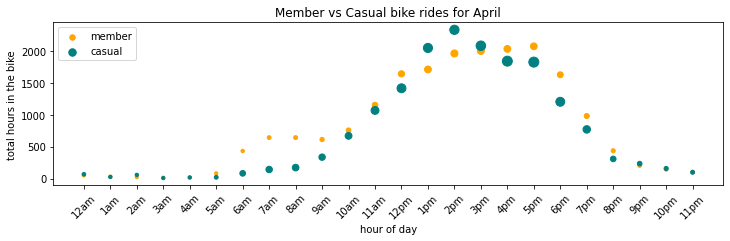

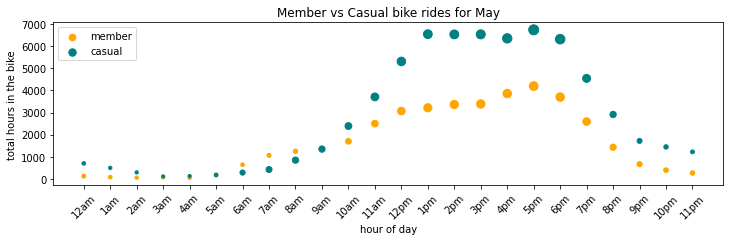

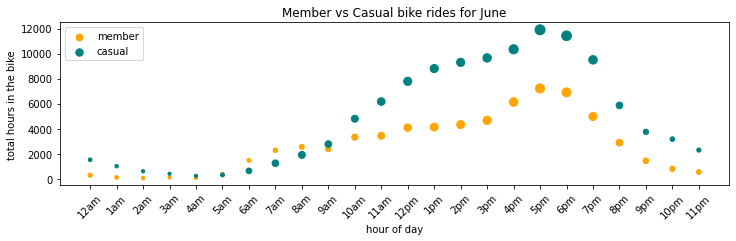

In [213]:
# import warnings
# warnings.filterwarnings("ignore")
create_versus_scatter(data1, 'April')
create_versus_scatter(data2, 'May')
create_versus_scatter(data3, 'June')